In [1]:
from __future__ import print_function, division
import numpy as np
from glob import glob
import pandas as pd
import os
from tqdm import tqdm
output_path = os.path.join('..','input')
import matplotlib.pyplot as plt
from skimage.util._montage import montage
from skimage.color import label2rgb
import h5py
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.models import Model
from keras.engine.topology import get_source_inputs
from keras.utils import get_file
from keras.utils import layer_utils
from keras.layers.merge import add
import keras
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
from IPython import display
from sklearn.metrics import roc_curve, auc
from keras.models import load_model
%matplotlib inline

Using TensorFlow backend.


In [2]:
SqueezeNet10 = load_model('SqueezeNet-10.h5')
AlexNet8 = load_model('AlexNet-8.h5')
ResSQNet10 = load_model('ResSQNet-10.h5')
ResSQNet20 = load_model('ResSQNet-20.h5')

In [3]:
with h5py.File('all_patches.hdf5') as luna_h5:
    all_slices = luna_h5['ct_slices'].value
    all_classes = luna_h5['slice_class'].value
    print('data', all_slices.shape, 'classes', all_classes.shape)

D:\Users\asus\anaconda3\envs\keras\lib\site-packages\ipykernel\__main__.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  if __name__ == '__main__':
D:\Users\asus\anaconda3\envs\keras\lib\site-packages\ipykernel\__main__.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  from ipykernel import kernelapp as app


data (6691, 64, 64) classes (6691, 1)


D:\Users\asus\anaconda3\envs\keras\lib\site-packages\ipykernel\__main__.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  app.launch_new_instance()


Text(0.5, 1.0, 'Benign Tiles')

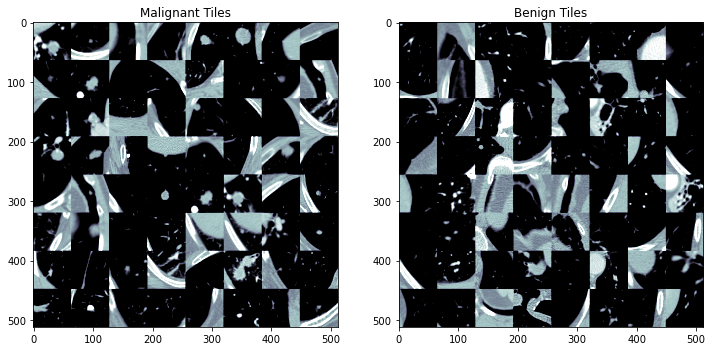

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12, 6))
plt_args = dict(cmap = 'bone', vmin = -600, vmax = 300)
ax1.imshow(montage(all_slices[np.random.choice(np.where(all_classes>0.5)[0],size = 64)]), **plt_args)
ax1.set_title('Malignant Tiles')
ax2.imshow(montage(all_slices[np.random.choice(np.where(all_classes<0.5)[0],size = 64)]), **plt_args)
ax2.set_title('Benign Tiles')

In [5]:
X_vec = (np.expand_dims(all_slices,-1) - np.mean(all_slices))/np.std(all_slices)

y_vec = to_categorical(all_classes)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, 
                                                   train_size = 0.75,
                                                   random_state = 1, 
                                                   stratify = all_classes)

In [6]:
SQN10_loss_his = []
ALX8_loss_his = []
Res10_loss_his = []
Res20_loss_his = []

In [7]:
for i in range(500):
    Res20_loss_his += [ResSQNet20.fit(X_train, y_train, 
              validation_data=(X_test, y_test),
                               shuffle = True,
                               batch_size = 32,
                               epochs = 1)]

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 56s 11ms/step - loss: 0.6302 - accuracy: 0.6525 - val_loss: 0.7014 - val_accuracy: 0.6264
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.4912 - accuracy: 0.7728 - val_loss: 0.6029 - val_accuracy: 0.7400
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 49s 10ms/step - loss: 0.3905 - accuracy: 0.8236 - val_loss: 0.4326 - val_accuracy: 0.8063
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 48s 10ms/step - loss: 0.3055 - accuracy: 0.8735 - val_loss: 0.5811 - val_accuracy: 0.8219
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.2494 - accuracy: 0.8972 - val_loss: 0.3768 - val_accuracy: 0.8763
Train on 5018 samples, validate on 16

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 46s 9ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.3378 - val_accuracy: 0.9516
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0099 - accuracy: 0.9976 - val_loss: 0.2623 - val_accuracy: 0.9617
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0114 - accuracy: 0.9974 - val_loss: 0.3582 - val_accuracy: 0.9546
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.3409 - val_accuracy: 0.9605
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.3556 - val_accuracy: 0.9558
Train on 5018 samples, validate on 1673 

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 46s 9ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.3047 - val_accuracy: 0.9695
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 48s 10ms/step - loss: 1.0326e-04 - accuracy: 1.0000 - val_loss: 0.3203 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 3.4490e-06 - accuracy: 1.0000 - val_loss: 0.2922 - val_accuracy: 0.9719
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 46s 9ms/step - loss: 2.2067e-05 - accuracy: 1.0000 - val_loss: 0.4705 - val_accuracy: 0.9641
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.4726 - val_accuracy: 0.9659
Train on 5018 samples, vali

5018/5018 [==============================] - 46s 9ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.3747 - val_accuracy: 0.9701
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 46s 9ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.3969 - val_accuracy: 0.9635
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 3.1256e-04 - accuracy: 0.9998 - val_loss: 0.4350 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0070 - accuracy: 0.9992 - val_loss: 0.3971 - val_accuracy: 0.9689
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.4238 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=========================

5018/5018 [==============================] - 47s 9ms/step - loss: 1.0928e-08 - accuracy: 1.0000 - val_loss: 0.5521 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 48s 9ms/step - loss: 5.9794e-07 - accuracy: 1.0000 - val_loss: 0.5668 - val_accuracy: 0.9671
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 7.1981e-09 - accuracy: 1.0000 - val_loss: 0.5588 - val_accuracy: 0.9683
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.6063 - val_accuracy: 0.9671
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 1.9161e-07 - accuracy: 1.0000 - val_loss: 0.5502 - val_accuracy: 0.9671
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=============

5018/5018 [==============================] - 47s 9ms/step - loss: 7.1269e-11 - accuracy: 1.0000 - val_loss: 0.5193 - val_accuracy: 0.9761
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 2.5592e-04 - accuracy: 0.9998 - val_loss: 0.5552 - val_accuracy: 0.9731
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 1.2828e-09 - accuracy: 1.0000 - val_loss: 0.5856 - val_accuracy: 0.9719
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 2.7557e-09 - accuracy: 1.0000 - val_loss: 0.5648 - val_accuracy: 0.9719
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 4.6036e-04 - accuracy: 0.9998 - val_loss: 0.5103 - val_accuracy: 0.9725
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=========

5018/5018 [==============================] - 49s 10ms/step - loss: 1.9005e-09 - accuracy: 1.0000 - val_loss: 0.7365 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 48s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7345 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7331 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7339 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 49s 10ms/step - loss: 8.5523e-10 - accuracy: 1.0000 - val_loss: 0.7251 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=======

5018/5018 [==============================] - 48s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5885 - val_accuracy: 0.9707
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 2.3756e-11 - accuracy: 1.0000 - val_loss: 0.5869 - val_accuracy: 0.9707
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5862 - val_accuracy: 0.9713
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 1.4491e-09 - accuracy: 1.0000 - val_loss: 0.5897 - val_accuracy: 0.9713
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 47s 9ms/step - loss: 2.3756e-11 - accuracy: 1.0000 - val_loss: 0.5860 - val_accuracy: 0.9713
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [========

In [8]:
for i in range(500):
    Res10_loss_his += [ResSQNet10.fit(X_train, y_train, 
              validation_data=(X_test, y_test),
                               shuffle = True,
                               batch_size = 32,
                               epochs = 1)]

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 28s 6ms/step - loss: 0.6435 - accuracy: 0.6166 - val_loss: 0.6669 - val_accuracy: 0.6222
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.5696 - accuracy: 0.7019 - val_loss: 1.0119 - val_accuracy: 0.6246
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.4675 - accuracy: 0.7826 - val_loss: 0.8910 - val_accuracy: 0.6455
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.3582 - accuracy: 0.8422 - val_loss: 0.5639 - val_accuracy: 0.7621
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.2768 - accuracy: 0.8886 - val_loss: 0.3885 - val_accuracy: 0.8237
Train on 5018 samples, validate on 1673 

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 24s 5ms/step - loss: 0.0111 - accuracy: 0.9960 - val_loss: 0.3104 - val_accuracy: 0.9342
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 25s 5ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.2816 - val_accuracy: 0.9456
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 23s 5ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.2821 - val_accuracy: 0.9295
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 30s 6ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.4731 - val_accuracy: 0.9133
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 28s 6ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.3362 - val_accuracy: 0.9205
Train on 5018 samples, validate on 1673 

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
  96/5018 [..............................] - ETA: 37s - loss: 0.0057 - accuracy: 1.0000    

D:\Users\asus\anaconda3\envs\keras\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.139335). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


5018/5018 [==============================] - 22s 4ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.2695 - val_accuracy: 0.9456
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 9.3840e-04 - accuracy: 0.9996 - val_loss: 0.2565 - val_accuracy: 0.9576
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 8.2009e-04 - accuracy: 0.9998 - val_loss: 0.2748 - val_accuracy: 0.9528
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 8.8007e-04 - accuracy: 1.0000 - val_loss: 0.2763 - val_accuracy: 0.9468
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.3498 - val_accuracy: 0.9283
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=================

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1919 - val_accuracy: 0.9546
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0031 - accuracy: 0.9984 - val_loss: 0.2570 - val_accuracy: 0.9516
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0123 - accuracy: 0.9972 - val_loss: 0.2561 - val_accuracy: 0.9474
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.2025 - val_accuracy: 0.9510
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1928 - val_accuracy: 0.9570
Train on 5018 samples, validate on 1673 

5018/5018 [==============================] - 22s 4ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.2953 - val_accuracy: 0.9468
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.2514 - val_accuracy: 0.9516
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0122 - accuracy: 0.9970 - val_loss: 0.2359 - val_accuracy: 0.9552
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.2515 - val_accuracy: 0.9528
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 6.1554e-04 - accuracy: 0.9998 - val_loss: 0.2243 - val_accuracy: 0.9576
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=========================

5018/5018 [==============================] - 22s 4ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.2871 - val_accuracy: 0.9468
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.2062 - val_accuracy: 0.9570
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1887 - val_accuracy: 0.9594
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 5.1040e-04 - accuracy: 0.9996 - val_loss: 0.2251 - val_accuracy: 0.9552
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 3.8155e-04 - accuracy: 0.9998 - val_loss: 0.2249 - val_accuracy: 0.9588
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=====================

5018/5018 [==============================] - 22s 4ms/step - loss: 2.7230e-04 - accuracy: 1.0000 - val_loss: 0.1907 - val_accuracy: 0.9629
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 1.9404e-04 - accuracy: 1.0000 - val_loss: 0.1933 - val_accuracy: 0.9647
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 4.1490e-04 - accuracy: 0.9998 - val_loss: 0.1876 - val_accuracy: 0.9629
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 1.3274e-04 - accuracy: 1.0000 - val_loss: 0.1901 - val_accuracy: 0.9647
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 22s 4ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.2275 - val_accuracy: 0.9605
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=============

In [9]:
for i in range(500):
    SQN10_loss_his += [SqueezeNet10.fit(X_train, y_train, 
              validation_data=(X_test, y_test),
                               shuffle = True,
                               batch_size = 32,
                               epochs = 1)]


Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 20s 4ms/step - loss: 0.6685 - accuracy: 0.6226 - val_loss: 0.6643 - val_accuracy: 0.6222
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.6633 - accuracy: 0.6226 - val_loss: 0.6623 - val_accuracy: 0.622211s - loss: 0.6724 - accuracy: 0. - ETA: 11s -
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.6565 - accuracy: 0.6226 - val_loss: 0.6601 - val_accuracy: 0.6222
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 18s 4ms/step - loss: 0.6453 - accuracy: 0.6226 - val_loss: 0.6502 - val_accuracy: 0.6222
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.6159 - accuracy: 0.6226 - val_loss: 0.6022 - val_accuracy: 0

5018/5018 [==============================] - 17s 3ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.2690 - val_accuracy: 0.9360 0.0286 - accuracy:  - ETA: 8s - loss: - ETA: 7s - loss: 0 - ETA: 6s - loss: 0.0226 - accuracy: 0. - ETA - ETA: 4s - loss: - ETA: 3s - loss: 0.0214 - ac - ETA: 2s - loss: 0.0 - ETA: 1s - loss: 0.0210 -  - ETA: 0s - loss: 0.0225 - accuracy: 0.99 - ETA: 0s - loss: 0.0223 - accuracy: 
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0246 - accuracy: 0.9914 - val_loss: 0.2614 - val_accuracy: 0.9325 accuracy: 0. - ETA: 
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.2938 - val_accuracy: 0.9396
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0101 - accuracy: 0.9962 - val_loss: 0.3146 - val_accu

5018/5018 [==============================] - 17s 3ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.3027 - val_accuracy: 0.9432
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.2765 - val_accuracy: 0.93722 - ac - ETA: 1s
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0085 - accuracy: 0.9962 - val_loss: 0.3343 - val_accuracy: 0.9396racy: 0.9 -  - ETA: 8s - loss: 0.0091 -  - - ETA: 5s - loss: 0.0077 - accuracy: 0. - ETA: 5s - loss: 0.007
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 18s 3ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.3304 - val_accuracy: 0.9384
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.3171

5018/5018 [==============================] - 17s 3ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.3654 - val_accuracy: 0.9348
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.2996 - val_accuracy: 0.9498TA: 4s - ETA: 2s - loss: 0.0067 - accuracy: 0. - ETA:  - ETA: 0s - loss: 0.0058 
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 1.7165e-04 - accuracy: 1.0000 - val_loss: 0.3336 - val_accuracy: 0.9480- ETA: 13s - loss: 1.4369e-04 - accu - ETA: 12s - loss: 3.9287e-04 - accuracy: 1 - - ETA: 8s - ETA: 4s - loss: 2.0 - ETA: 3s - loss: 1.8995e-04 - accu
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 7.5091e-05 - accuracy: 1.0000 - val_loss: 0.3481 - val_accuracy: 0.9474 loss: 9.5796e-05 - accuracy: 1.00 - ETA: 11s - loss:

5018/5018 [==============================] - 17s 3ms/step - loss: 2.9996e-05 - accuracy: 1.0000 - val_loss: 0.3398 - val_accuracy: 0.9510 5.0022e-0 - ETA: 5s - loss: 4 - ETA: 4s - loss: 3.8655e-05 - ac - ETA: 3s - loss: 3.6564e-0
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 1.0502e-05 - accuracy: 1.0000 - val_loss: 0.3446 - val_accuracy: 0.9528 - - ETA: 5s - loss: 1 - ETA: 4s - loss: 1.1612e-05 - accu - ETA: 3s - loss: 1.1371e-05 - ac - ETA:  - ETA: 0s - loss: 1.0656e-05 - ac
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 1.3298e-05 - accuracy: 1.0000 - val_loss: 0.3513 - val_accuracy: 0.9540: 14s - loss: 1.6767e- - ETA: 12s - loss: 1.0049e-05 - accuracy - ETA: 11s - loss: 1.0060e - ETA: 2s - loss: 1.4440e-05 - accuracy - ETA: 1s - loss: 1.4329e-05 - accuracy - ETA: 1s - loss: 1
Train on 5018 samples, validate on 1673 samples
Epoch 

5018/5018 [==============================] - 17s 3ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.3406 - val_accuracy: 0.9181
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.3530 - val_accuracy: 0.9408ss: 0.0527 - accuracy: 0.98 - ETA: 13s - loss: 0.049 - ETA: 11s - loss: 0.0330 - acc - ETA: 3s - loss: 0.0151  - ETA: 2s - loss: 0.0143  - ETA: 1s - loss: 0.0136 - accura - ETA: 0s - loss: 0.0131 - 
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.2342 - val_accuracy: 0.9474
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 18s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2968 - val_accuracy: 0.9486
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=======================

5018/5018 [==============================] - 17s 3ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.2977 - val_accuracy: 0.9516 6s - ETA: 4s - loss: 0.0019 - accu - ETA: 3s
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.2757 - val_accuracy: 0.9582
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 1.3766e-04 - accuracy: 1.0000 - val_loss: 0.2800 - val_accuracy: 0.9582cur - ETA: 10s - loss: 2.241 - ETA: 1s - loss: 1.4889e-04 - accura - ETA: 1s - loss: 1.4449e
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 3.7898e-05 - accuracy: 1.0000 - val_loss: 0.2918 - val_accuracy: 0.9582-05 - accura - ETA: 11s - loss: 5.5602e-05 - accuracy: 1. - ETA: 10s - loss: 5.1644e-05 - accuracy: 1.000 - ETA: 10s - loss: 5.14 - ETA: 9s - loss

5018/5018 [==============================] - 17s 3ms/step - loss: 2.4437e-06 - accuracy: 1.0000 - val_loss: 0.3938 - val_accuracy: 0.9546ETA: 12s - loss: 2.8721e-07 - ac - ETA: 11s - loss: 2.6408e-07 - accuracy: 1.0 - ETA: 10s - loss: 2.4827e-07 - ac
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 4.2250e-07 - accuracy: 1.0000 - val_loss: 0.3974 - val_accuracy: 0.9546
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 5.5665e-07 - accuracy: 1.0000 - val_loss: 0.4013 - val_accuracy: 0.9564
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 17s 3ms/step - loss: 0.0396 - accuracy: 0.9886 - val_loss: 0.2126 - val_accuracy: 0.94141. - ETA: 13s - loss: 7.9851e-08 - accu - ETA: 1 - ETA: 6s - loss: 0.040 - ETA: 5s - - ETA: 4s - loss: 0.0468 - accu - ETA: 3s - los - ETA: 1s - loss: 0.0427  - ETA: 

In [10]:
AlexNet8 = load_model('AlexNet-8.h5')
for i in range(500):
    ALX8_loss_his += [AlexNet8.fit(X_train, y_train, 
              validation_data=(X_test, y_test),
                               shuffle = True,
                               batch_size = 32,
                               epochs = 1)]

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 129s 26ms/step - loss: 0.6469 - accuracy: 0.6359 - val_loss: 0.6163 - val_accuracy: 0.6874
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 128s 26ms/step - loss: 0.5981 - accuracy: 0.6889 - val_loss: 0.5736 - val_accuracy: 0.7268
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 129s 26ms/step - loss: 0.5497 - accuracy: 0.7290 - val_loss: 0.5191 - val_accuracy: 0.7693
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 132s 26ms/step - loss: 0.5127 - accuracy: 0.7595 - val_loss: 0.4883 - val_accuracy: 0.7693
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 131s 26ms/step - loss: 0.4670 - accuracy: 0.7933 - val_loss: 0.4480 - val_accuracy: 0.8022
Train on 5018 samples, validat

5018/5018 [==============================] - 129s 26ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.1608 - val_accuracy: 0.9617
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 129s 26ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.1844 - val_accuracy: 0.9534
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 130s 26ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.1603 - val_accuracy: 0.9611
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 131s 26ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.2317 - val_accuracy: 0.9456
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 132s 26ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.1739 - val_accuracy: 0.9570
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [===================

5018/5018 [==============================] - 129s 26ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.2963 - val_accuracy: 0.9647
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 129s 26ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.2724 - val_accuracy: 0.9641
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 129s 26ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.2948 - val_accuracy: 0.9629
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 129s 26ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.2861 - val_accuracy: 0.9647
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 129s 26ms/step - loss: 9.7730e-04 - accuracy: 0.9998 - val_loss: 0.2929 - val_accuracy: 0.9641
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [===============

5018/5018 [==============================] - 132s 26ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.3459 - val_accuracy: 0.9605
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 145s 29ms/step - loss: 3.5794e-04 - accuracy: 0.9998 - val_loss: 0.3874 - val_accuracy: 0.9600
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 154s 31ms/step - loss: 7.7060e-04 - accuracy: 0.9996 - val_loss: 0.4518 - val_accuracy: 0.9534
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 147s 29ms/step - loss: 8.0650e-04 - accuracy: 0.9998 - val_loss: 0.3188 - val_accuracy: 0.9635
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 130s 26ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.3374 - val_accuracy: 0.9623
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=======

5018/5018 [==============================] - 132s 26ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.4645 - val_accuracy: 0.9546
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 130s 26ms/step - loss: 1.3878e-05 - accuracy: 1.0000 - val_loss: 0.3409 - val_accuracy: 0.9665
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 137s 27ms/step - loss: 6.6890e-04 - accuracy: 0.9998 - val_loss: 0.4486 - val_accuracy: 0.9576
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 148s 30ms/step - loss: 1.3972e-04 - accuracy: 1.0000 - val_loss: 0.4011 - val_accuracy: 0.9629
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 143s 28ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.4557 - val_accuracy: 0.9534
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [=======

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 130s 26ms/step - loss: 3.0571e-05 - accuracy: 1.0000 - val_loss: 0.3847 - val_accuracy: 0.9617
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 130s 26ms/step - loss: 2.9576e-04 - accuracy: 0.9998 - val_loss: 0.4176 - val_accuracy: 0.9617
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 129s 26ms/step - loss: 5.0863e-07 - accuracy: 1.0000 - val_loss: 0.4044 - val_accuracy: 0.9641
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 130s 26ms/step - loss: 3.9506e-06 - accuracy: 1.0000 - val_loss: 0.3938 - val_accuracy: 0.9635
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 132s 26ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.5093 - val_accuracy: 0.9576
Train on 5018 

Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 141s 28ms/step - loss: 1.4254e-10 - accuracy: 1.0000 - val_loss: 0.3888 - val_accuracy: 0.9671
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 143s 28ms/step - loss: 1.9005e-10 - accuracy: 1.0000 - val_loss: 0.3893 - val_accuracy: 0.9665
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 140s 28ms/step - loss: 2.8508e-10 - accuracy: 1.0000 - val_loss: 0.3959 - val_accuracy: 0.9659
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 142s 28ms/step - loss: 5.7015e-10 - accuracy: 1.0000 - val_loss: 0.3813 - val_accuracy: 0.9659
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 144s 29ms/step - loss: 1.8480e-05 - accuracy: 1.0000 - val_loss: 0.4184 - val_accuracy: 0.9629
Train on 5

5018/5018 [==============================] - 131s 26ms/step - loss: 7.3645e-10 - accuracy: 1.0000 - val_loss: 0.4147 - val_accuracy: 0.9653
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 131s 26ms/step - loss: 3.0883e-10 - accuracy: 1.0000 - val_loss: 0.4093 - val_accuracy: 0.9677
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 132s 26ms/step - loss: 2.3756e-11 - accuracy: 1.0000 - val_loss: 0.4105 - val_accuracy: 0.9671
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 132s 26ms/step - loss: 9.5025e-11 - accuracy: 1.0000 - val_loss: 0.4142 - val_accuracy: 0.9689
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 [==============================] - 133s 26ms/step - loss: 1.9005e-10 - accuracy: 1.0000 - val_loss: 0.4152 - val_accuracy: 0.9683
Train on 5018 samples, validate on 1673 samples
Epoch 1/1
5018/5018 

5018/5018 [==============================] - 129s 26ms/step - loss: 1.4600e-06 - accuracy: 1.0000 - val_loss: 0.4514 - val_accuracy: 0.9641


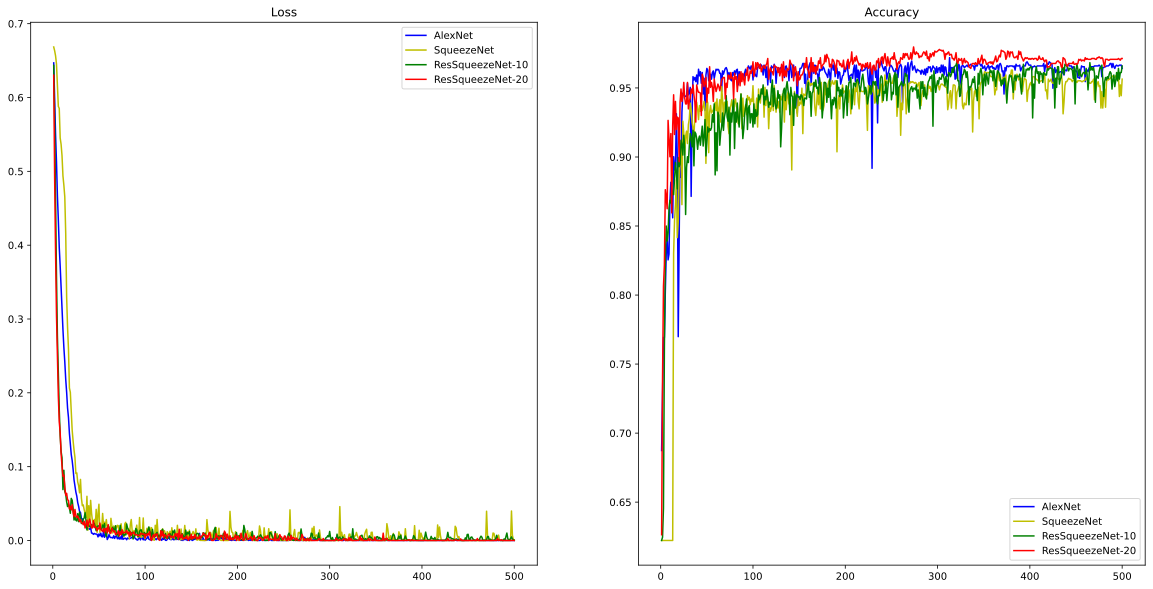

In [60]:
epich1 = np.cumsum(np.concatenate(
    [np.linspace(1, 1, len(mh.epoch)) for mh in ALX8_loss_his]))
epich2 = np.cumsum(np.concatenate(
    [np.linspace(1, 1, len(mh.epoch)) for mh in SQN10_loss_his]))
epich3 = np.cumsum(np.concatenate(
    [np.linspace(1, 1, len(mh.epoch)) for mh in Res10_loss_his]))
epich4 = np.cumsum(np.concatenate(
    [np.linspace(1, 1, len(mh.epoch)) for mh in Res20_loss_his]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
_ = ax1.plot(epich1,
             np.concatenate([mh.history['loss'] for mh in ALX8_loss_his]),'b-',
             epich2, 
             np.concatenate([mh.history['loss'] for mh in SQN10_loss_his]), 'y-', 
             epich3, 
             np.concatenate([mh.history['loss'] for mh in Res10_loss_his]), 'g-',
             epich4, 
             np.concatenate([mh.history['loss'] for mh in Res20_loss_his]), 'r-'
            )
ax1.legend(['AlexNet', 'SqueezeNet','ResSqueezeNet-10','ResSqueezeNet-20'])
ax1.set_title('Loss')

_ = ax2.plot(epich1,
             np.concatenate([mh.history['val_accuracy'] for mh in ALX8_loss_his]),'b-',
             epich2, 
             np.concatenate([mh.history['val_accuracy'] for mh in SQN10_loss_his]), 'y-', 
             epich3, 
             np.concatenate([mh.history['val_accuracy'] for mh in Res10_loss_his]), 'g-',
             epich4, 
             np.concatenate([mh.history['val_accuracy'] for mh in Res20_loss_his]), 'r-'
            )
ax2.legend(['AlexNet', 'SqueezeNet','ResSqueezeNet-10','ResSqueezeNet-20'])
ax2.set_title('Accuracy')

plt.savefig('D:\\Users\\asus\\ALL_compare.png')

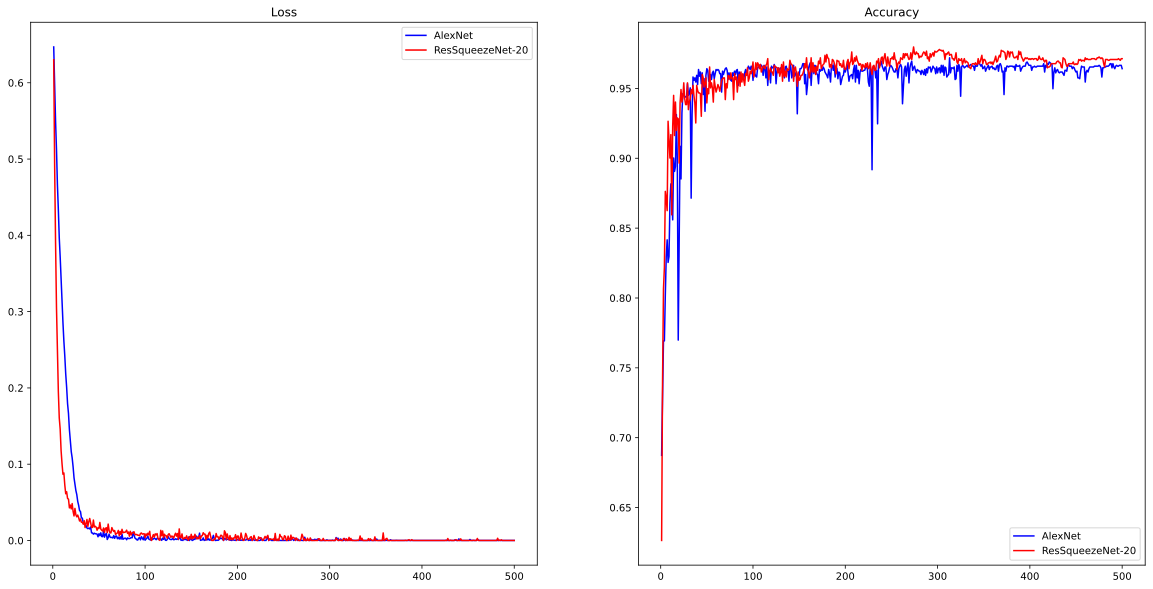

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
_ = ax1.plot(epich1,
             np.concatenate([mh.history['loss'] for mh in ALX8_loss_his]),'b-',
             epich4, 
             np.concatenate([mh.history['loss'] for mh in Res20_loss_his]), 'r-'
            )
ax1.legend(['AlexNet','ResSqueezeNet-20'])
ax1.set_title('Loss')

_ = ax2.plot(epich1,
             np.concatenate([mh.history['val_accuracy'] for mh in ALX8_loss_his]),'b-',
#              epich2, 
#              np.concatenate([mh.history['val_accuracy'] for mh in SQN10_loss_his]), 'y-', 
#              epich3, 
#              np.concatenate([mh.history['val_accuracy'] for mh in Res10_loss_his]), 'g-',
             epich4, 
             np.concatenate([mh.history['val_accuracy'] for mh in Res20_loss_his]), 'r-'
            )
ax2.legend(['AlexNet','ResSqueezeNet-20'])
ax2.set_title('Accuracy')

plt.savefig('D:\\Users\\asus\\Alex_ResSQZ20.png')

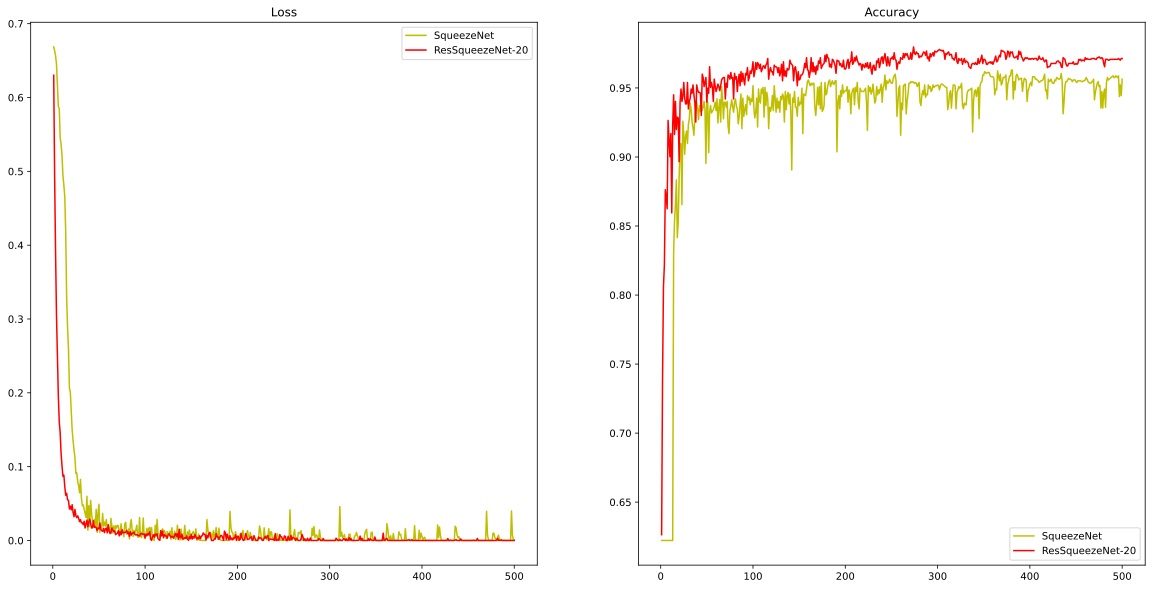

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
_ = ax1.plot(
#              epich1,
#              np.concatenate([mh.history['loss'] for mh in ALX8_loss_his]),'b-',
             epich2, 
             np.concatenate([mh.history['loss'] for mh in SQN10_loss_his]), 'y-', 
#              epich3, 
#              np.concatenate([mh.history['loss'] for mh in Res10_loss_his]), 'g-',
             epich4, 
             np.concatenate([mh.history['loss'] for mh in Res20_loss_his]), 'r-'
            )
ax1.legend(['SqueezeNet','ResSqueezeNet-20'])
ax1.set_title('Loss')

_ = ax2.plot(
#              epich1,
#              np.concatenate([mh.history['val_accuracy'] for mh in ALX8_loss_his]),'b-',
             epich2, 
             np.concatenate([mh.history['val_accuracy'] for mh in SQN10_loss_his]), 'y-', 
#              epich3, 
#              np.concatenate([mh.history['val_accuracy'] for mh in Res10_loss_his]), 'g-',
             epich4, 
             np.concatenate([mh.history['val_accuracy'] for mh in Res20_loss_his]), 'r-'
            )
ax2.legend(['SqueezeNet','ResSqueezeNet-20'])
ax2.set_title('Accuracy')

plt.savefig('D:\\Users\\asus\\Squeeze_ResSQZ20.png')

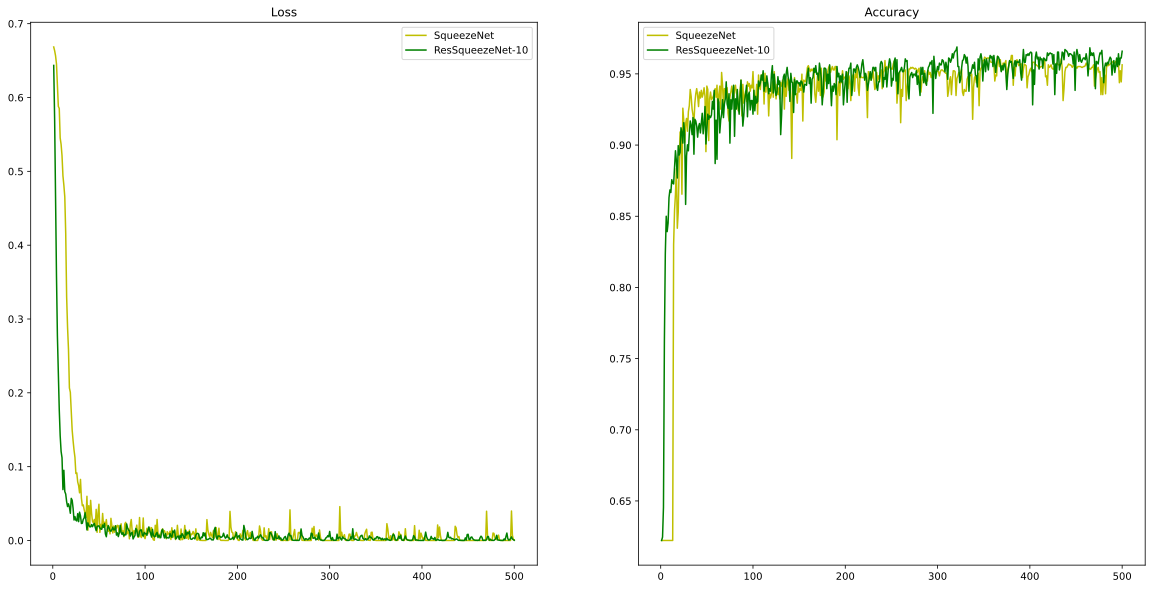

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
_ = ax1.plot(
#              epich1,
#              np.concatenate([mh.history['loss'] for mh in ALX8_loss_his]),'b-',
             epich2, 
             np.concatenate([mh.history['loss'] for mh in SQN10_loss_his]), 'y-', 
             epich3, 
             np.concatenate([mh.history['loss'] for mh in Res10_loss_his]), 'g-',
#              epich4, 
#              np.concatenate([mh.history['loss'] for mh in Res20_loss_his]), 'r-'
            )
ax1.legend(['SqueezeNet','ResSqueezeNet-10'])
ax1.set_title('Loss')

_ = ax2.plot(
#              epich1,
#              np.concatenate([mh.history['val_accuracy'] for mh in ALX8_loss_his]),'b-',
             epich2, 
             np.concatenate([mh.history['val_accuracy'] for mh in SQN10_loss_his]), 'y-', 
             epich3, 
             np.concatenate([mh.history['val_accuracy'] for mh in Res10_loss_his]), 'g-',
#              epich4, 
#              np.concatenate([mh.history['val_accuracy'] for mh in Res20_loss_his]), 'r-'
            )
ax2.legend(['SqueezeNet','ResSqueezeNet-10'])
ax2.set_title('Accuracy')

plt.savefig('D:\\Users\\asus\\Squeeze_ResSQZ10.png')

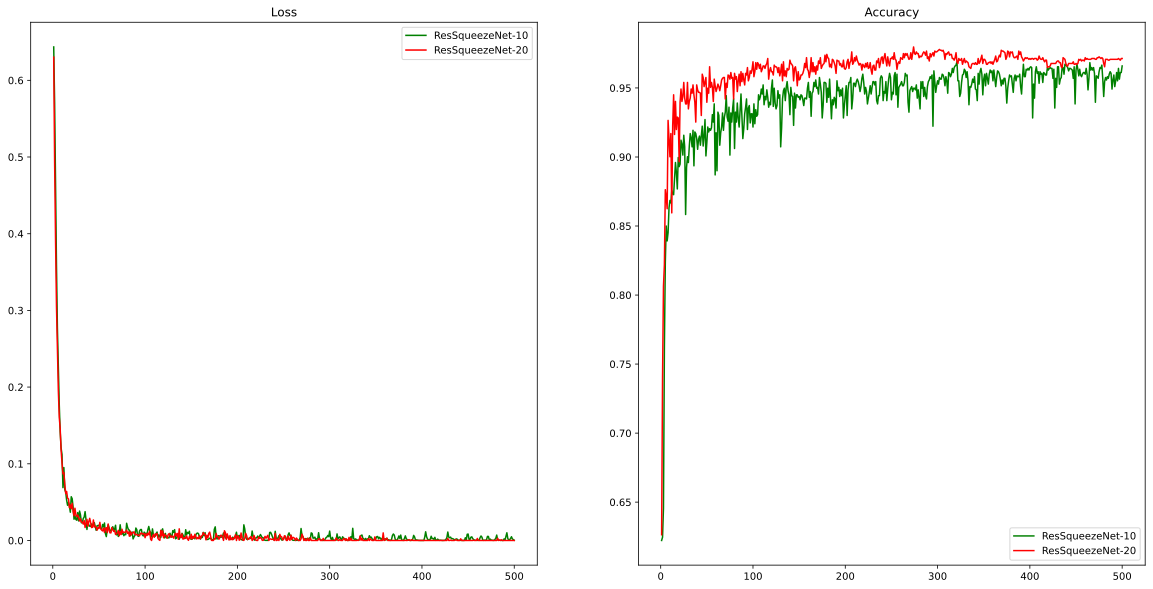

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
_ = ax1.plot(
#              epich1,
#              np.concatenate([mh.history['loss'] for mh in ALX8_loss_his]),'b-',
#              epich2, 
#              np.concatenate([mh.history['loss'] for mh in SQN10_loss_his]), 'y-', 
             epich3, 
             np.concatenate([mh.history['loss'] for mh in Res10_loss_his]), 'g-',
             epich4, 
             np.concatenate([mh.history['loss'] for mh in Res20_loss_his]), 'r-'
            )
ax1.legend(['ResSqueezeNet-10','ResSqueezeNet-20'])
ax1.set_title('Loss')

_ = ax2.plot(
#              epich1,
#              np.concatenate([mh.history['val_accuracy'] for mh in ALX8_loss_his]),'b-',
#              epich2, 
#              np.concatenate([mh.history['val_accuracy'] for mh in SQN10_loss_his]), 'y-', 
             epich3, 
             np.concatenate([mh.history['val_accuracy'] for mh in Res10_loss_his]), 'g-',
             epich4, 
             np.concatenate([mh.history['val_accuracy'] for mh in Res20_loss_his]), 'r-'
            )
ax2.legend(['ResSqueezeNet-10','ResSqueezeNet-20'])
ax2.set_title('Accuracy')

plt.savefig('D:\\Users\\asus\\ResSQZ10_ResSQZ20.png')

In [20]:
y_pred_proba = ResSQNet20.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print('')
print(classification_report(np.argmax(y_test,1),
                      y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1041
           1       0.97      0.95      0.96       632

    accuracy                           0.97      1673
   macro avg       0.97      0.97      0.97      1673
weighted avg       0.97      0.97      0.97      1673



In [21]:
y_pred_proba = ResSQNet10.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print('')
print(classification_report(np.argmax(y_test,1),
                      y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1041
           1       0.96      0.95      0.95       632

    accuracy                           0.97      1673
   macro avg       0.97      0.96      0.96      1673
weighted avg       0.97      0.97      0.97      1673



In [22]:
y_pred_proba = SqueezeNet10.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print('')
print(classification_report(np.argmax(y_test,1),
                      y_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1041
           1       0.95      0.94      0.94       632

    accuracy                           0.96      1673
   macro avg       0.95      0.95      0.95      1673
weighted avg       0.96      0.96      0.96      1673



In [23]:
y_pred_proba = AlexNet8.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print('')
print(classification_report(np.argmax(y_test,1),
                      y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1041
           1       0.95      0.95      0.95       632

    accuracy                           0.96      1673
   macro avg       0.96      0.96      0.96      1673
weighted avg       0.96      0.96      0.96      1673



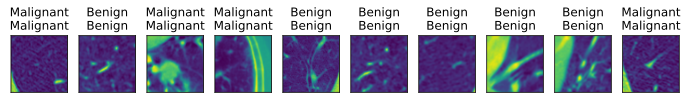

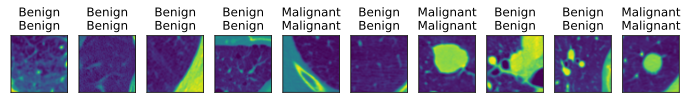

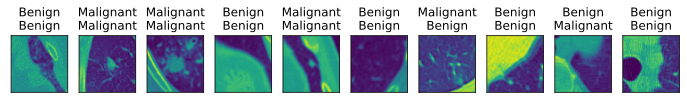

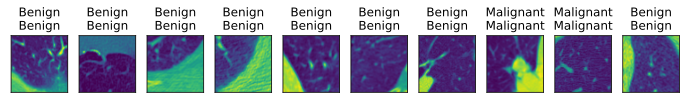

In [30]:
y_pred_proba = ResSQNet20.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)

def use_svg_display():
    display.set_matplotlib_formats('svg')

def get_labels(labels):
    text_labels = ['Benign', 'Malignant']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    use_svg_display()
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape(64,64))
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

true_labels = get_labels(np.argmax(y_test,1))
pred_labels = get_labels(y_pred)
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

for i in range(0,40,10):
    show_fashion_mnist(X_test[i:i+10], titles[i:i+10])

In [31]:
ResSQNet20.save('ResSQNet20_Trained.h5')
ResSQNet10.save('ResSQNet10_Trained.h5')
AlexNet8.save('AlexNet8_Trained.h5')
SqueezeNet10.save('SqueezeNet10_Trained.h5')

In [36]:
import time

In [41]:
tic1 = time.time()
y_pred_proba = AlexNet8.predict(X_test)
toc1 = time.time()
print('Test time for AlexNet8 : %fs' % (toc1 - tic1))

tic2 = time.time()
y_pred_proba = ResSQNet20.predict(X_test)
toc2 = time.time()
print('Test time for ResSQNet20 : %fs' % (toc2 - tic2))

tic3 = time.time()
y_pred_proba = ResSQNet10.predict(X_test)
toc3 = time.time()
print('Test time for ResSQNet10 : %fs' % (toc3 - tic3))

tic4 = time.time()
y_pred_proba = SqueezeNet10.predict(X_test)
toc4 = time.time()
print('Test time for SqueezeNet10 : %fs' % (toc4 - tic4))

Test time for AlexNet8 : 4.726683s
Test time for ResSQNet20 : 3.720674s
Test time for ResSQNet10 : 1.386681s
Test time for SqueezeNet10 : 1.109835s


Text(0.5, 1.0, 'Accuracy')

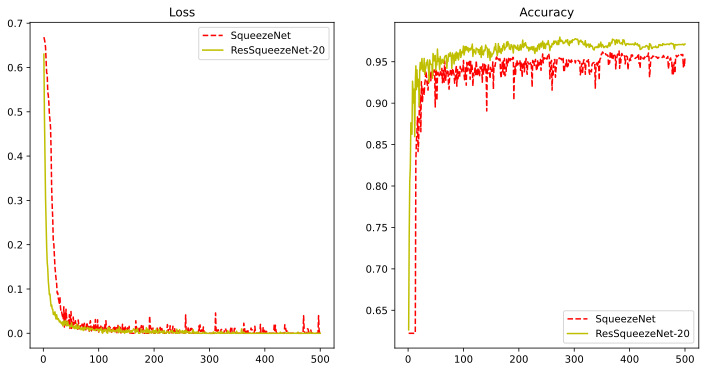

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
_ = ax1.plot(
#              epich1,
#              np.concatenate([mh.history['loss'] for mh in ALX8_loss_his]),'b-',
             epich2, 
             np.concatenate([mh.history['loss'] for mh in SQN10_loss_his]), 'r--', 
#              epich3, 
#              np.concatenate([mh.history['loss'] for mh in Res10_loss_his]), 'g-',
             epich4, 
             np.concatenate([mh.history['loss'] for mh in Res20_loss_his]), 'y-'
            )
ax1.legend(['SqueezeNet','ResSqueezeNet-20'])
ax1.set_title('Loss')

_ = ax2.plot(
#              epich1,
#              np.concatenate([mh.history['val_accuracy'] for mh in ALX8_loss_his]),'b-',
             epich2, 
             np.concatenate([mh.history['val_accuracy'] for mh in SQN10_loss_his]), 'r--', 
#              epich3, 
#              np.concatenate([mh.history['val_accuracy'] for mh in Res10_loss_his]), 'g-',
             epich4, 
             np.concatenate([mh.history['val_accuracy'] for mh in Res20_loss_his]), 'y-'
            )
ax2.legend(['SqueezeNet','ResSqueezeNet-20'])
ax2.set_title('Accuracy')

In [56]:
print(Res10_loss_his)

[<keras.callbacks.callbacks.History object at 0x000001876E84F0F0>, <keras.callbacks.callbacks.History object at 0x000001876E8628D0>, <keras.callbacks.callbacks.History object at 0x000001876E888898>, <keras.callbacks.callbacks.History object at 0x000001876E899F98>, <keras.callbacks.callbacks.History object at 0x000001876E8AABE0>, <keras.callbacks.callbacks.History object at 0x000001876E8B8128>, <keras.callbacks.callbacks.History object at 0x000001876E8C9FD0>, <keras.callbacks.callbacks.History object at 0x000001876E8EF630>, <keras.callbacks.callbacks.History object at 0x000001876E8EFA58>, <keras.callbacks.callbacks.History object at 0x000001876E9026D8>, <keras.callbacks.callbacks.History object at 0x000001876E914390>, <keras.callbacks.callbacks.History object at 0x000001876E9257F0>, <keras.callbacks.callbacks.History object at 0x000001876E93B0F0>, <keras.callbacks.callbacks.History object at 0x000001876E9147F0>, <keras.callbacks.callbacks.History object at 0x000001876E9020F0>, <keras.ca